<a href="https://colab.research.google.com/github/BlackCurrantDS/DBSE_Project/blob/main/FP_Growth_StepbyStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from collections import defaultdict
from itertools import chain, combinations

In [51]:
"""itemSetList = [['eggs', 'bacon', 'soup'],
                ['eggs', 'bacon', 'apple'],
                ['soup', 'bacon', 'banana']]"""

"itemSetList = [['eggs', 'bacon', 'soup'],\n                ['eggs', 'bacon', 'apple'],\n                ['soup', 'bacon', 'banana']]"

In [52]:
itemSetList = [['f', 'a', 'c', 'd', 'g', 'i','m','p'], f= a1@30-39,a2@
               ['a', 'b', 'c', 'f', 'l','m','o'],
               ['b', 'f', 'h', 'j','o'],
               ['b', 'c', 'k', 's','p'],
               ['a', 'f', 'c', 'e', 'l', 'p','m','n']
               
               ]

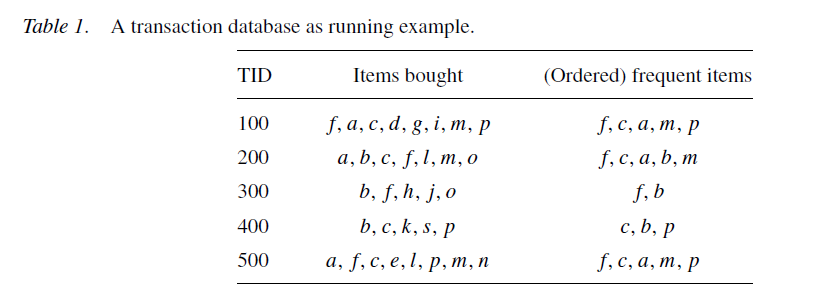

(f:4), 
(c:4), 
(a:3), 
(b:3), 
(m:3), 
(p:3)

frequencydescending
order.


In [53]:
minsup=0.6
minConf=0.5

In [54]:
def getFrequencyFromList(itemSetList):
    frequency = [1 for i in range(len(itemSetList))]
    return frequency

In [55]:
frequency = getFrequencyFromList(itemSetList)
frequency

[1, 1, 1, 1, 1]

In [56]:
class Node:
    def __init__(self, itemName, frequency, parentNode):
        self.itemName = itemName
        self.count = frequency
        self.parent = parentNode
        self.children = {}
        self.next = None

    def increment(self, frequency):
        self.count += frequency

    def display(self, ind=1):
        print('  ' * ind, self.itemName, ' ', self.count)
        for child in list(self.children.values()):
            child.display(ind+1)

In [57]:
def updateTree(item, treeNode, headerTable, frequency):
    if item in treeNode.children:
        # If the item already exists, increment the count
        treeNode.children[item].increment(frequency)
    else:
        # Create a new branch
        newItemNode = Node(item, frequency, treeNode)
        treeNode.children[item] = newItemNode
        # Link the new branch to header table
        updateHeaderTable(item, newItemNode, headerTable)

    return treeNode.children[item]

In [58]:
def updateHeaderTable(item, targetNode, headerTable):
    if(headerTable[item][1] == None):
        headerTable[item][1] = targetNode
    else:
        currentNode = headerTable[item][1]
        # Traverse to the last node then link it to the target
        while currentNode.next != None:
            currentNode = currentNode.next
        currentNode.next = targetNode

In [59]:
def ascendFPtree(node, prefixPath):
    if node.parent != None:
        prefixPath.append(node.itemName)
        ascendFPtree(node.parent, prefixPath)

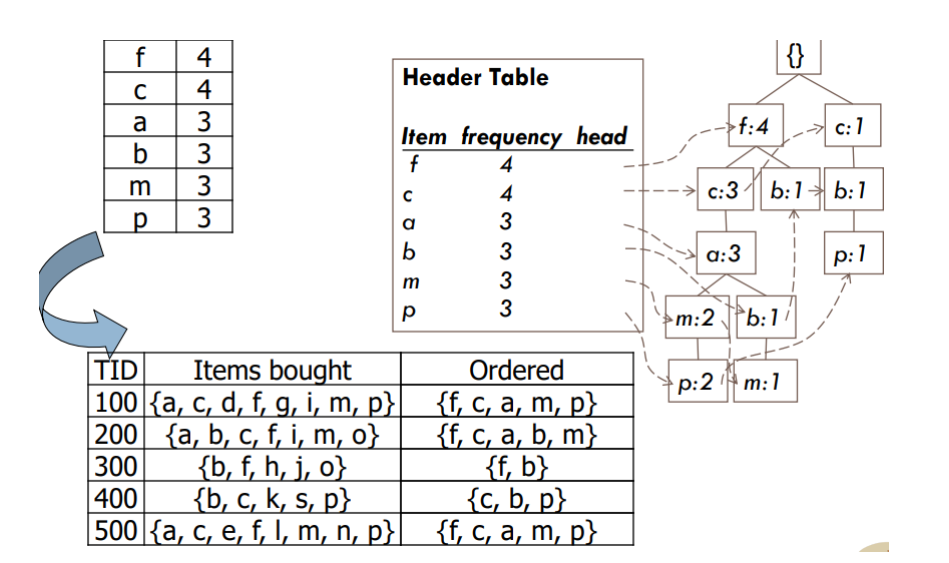

In [60]:
def constructTree(itemSetList, frequency, minSup):
    headerTable = defaultdict(int)
    print(headerTable)
    # Counting frequency and create header table
    for idx, itemSet in enumerate(itemSetList):
        for item in itemSet:
            headerTable[item] += frequency[idx]
    print("Adding items to dictionary",headerTable)
    # Deleting items below minSup
    headerTable = dict((item, sup) for item, sup in headerTable.items() if sup >= minSup)
    if(len(headerTable) == 0):
        return None, None
    print("Remving items from dictionary below min sup",headerTable)
    # HeaderTable column [Item: [frequency, headNode]]
    for item in headerTable:
        headerTable[item] = [headerTable[item], None]
    print("After Formatting",headerTable)
    # Init Null head node, class Node 
    fpTree = Node('Null', 1, None) 
    # Update FP tree for each cleaned and sorted itemSet
    for idx, itemSet in enumerate(itemSetList):
        itemSet = [item for item in itemSet if item in headerTable]
        itemSet.sort(key=lambda item: headerTable[item][0], reverse=True)
        # Traverse from root to leaf, update tree with given item
        currentNode = fpTree
        for item in itemSet:
            currentNode = updateTree(item, currentNode, headerTable, frequency[idx])
    print("headerTable",headerTable)
    print("fpTree",fpTree)
    return fpTree, headerTable

In [61]:
def findPrefixPath(basePat, headerTable):
    # First node in linked list
    treeNode = headerTable[basePat][1] 
    condPats = []
    frequency = []
    while treeNode != None:
        prefixPath = []
        # From leaf node all the way to root
        ascendFPtree(treeNode, prefixPath)  
        if len(prefixPath) > 1:
            # Storing the prefix path and it's corresponding count
            condPats.append(prefixPath[1:])
            frequency.append(treeNode.count)

        # Go to next node
        treeNode = treeNode.next  
    return condPats, frequency

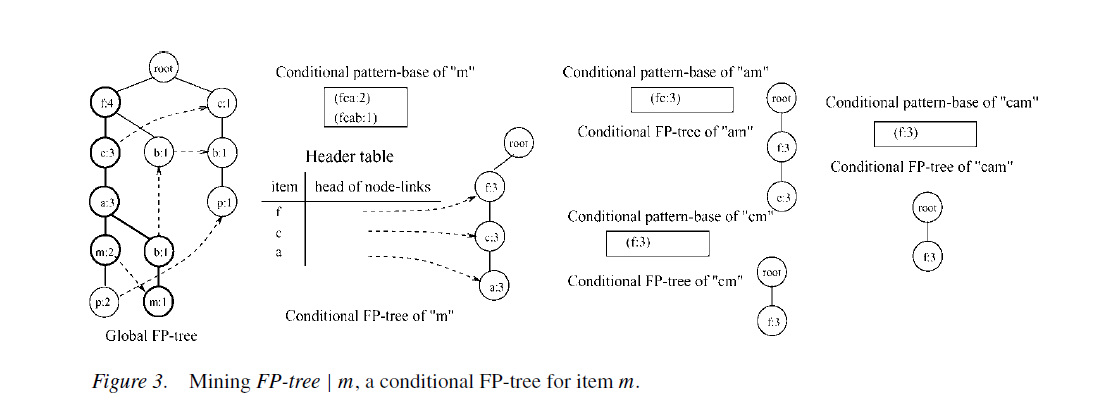

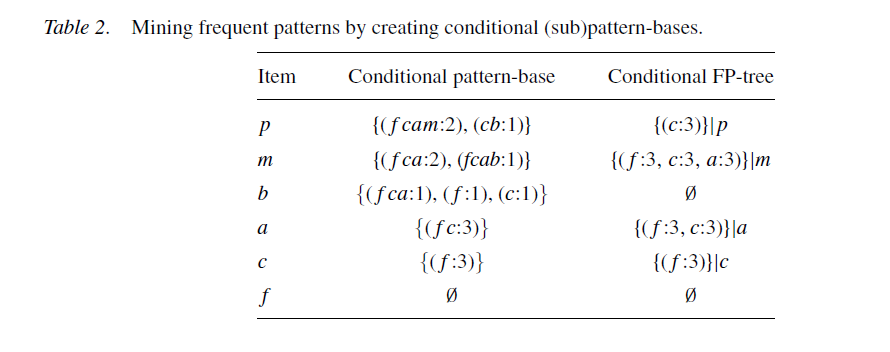

cp

fm,cm,am,fcam,fcm,fam,cam

fa:3,ca:3,fca:3

fc


In [62]:
def mineTree(headerTable, minSup, preFix, freqItemList):
    # Sort the items with frequency and create a list
    sortedItemList = [item[0] for item in sorted(list(headerTable.items()), key=lambda p:p[1][0])]
    print("sortedItemList", sortedItemList) 
    # Start with the lowest frequency
    for item in sortedItemList:  
        # Pattern growth is achieved by the concatenation of suffix pattern with frequent patterns generated from conditional FP-tree
        newFreqSet = preFix.copy()
        print("newFreqSet",newFreqSet)
        newFreqSet.add(item)
        print("newFreqSet",newFreqSet)
        freqItemList.append(newFreqSet)
        print("freqItemList",freqItemList)
        # Find all prefix path, constrcut conditional pattern base
        conditionalPattBase, frequency = findPrefixPath(item, headerTable) 
        # Construct conditonal FP Tree with conditional pattern base
        conditionalTree, newHeaderTable = constructTree(conditionalPattBase, frequency, minSup) 
        if newHeaderTable != None:
            # Mining recursively on the tree
            mineTree(newHeaderTable, minSup,
                       newFreqSet, freqItemList)

In [63]:
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

def getSupport(testSet, itemSetList):
    count = 0
    for itemSet in itemSetList:
        if(set(testSet).issubset(itemSet)):
            count += 1
    return count

In [64]:
def associationRule(freqItemSet, itemSetList, minConf):
    rules = []
    for itemSet in freqItemSet:
        subsets = powerset(itemSet)
        #print("subsets",subsets)
        itemSetSup = getSupport(itemSet, itemSetList)
        #print("itemSetSup",itemSetSup)
        for s in subsets:
            confidence = float(itemSetSup / getSupport(s, itemSetList))
            #print("confidence",confidence)
            if(confidence > minConf):
              rules.append([set(s), set(itemSet.difference(s)), confidence])
    #print("rules", rules)
    return rules

In [65]:
def fpgrowth(itemSetList, minSupRatio, minConf):
    frequency = getFrequencyFromList(itemSetList)
    print("frequency is:",frequency)
    minSup = len(itemSetList) * minSupRatio
    print("minSup is", minSup)
    fpTree, headerTable = constructTree(itemSetList, frequency, minSup)
    if(fpTree == None):
        print('No frequent item set')
    else:
        freqItems = []
        mineTree(headerTable, minSup, set(), freqItems)
        print("freqItems:")
        rules = associationRule(freqItems, itemSetList, minConf)
        return freqItems, rules

In [66]:
fpgrowth(itemSetList, minSupRatio=0.60, minConf=0.5)

frequency is: [1, 1, 1, 1, 1]
minSup is 3.0
defaultdict(<class 'int'>, {})
Adding items to dictionary defaultdict(<class 'int'>, {'f': 4, 'a': 3, 'c': 4, 'd': 1, 'g': 1, 'i': 1, 'm': 3, 'p': 3, 'b': 3, 'l': 2, 'o': 2, 'h': 1, 'j': 1, 'k': 1, 's': 1, 'e': 1, 'n': 1})
Remving items from dictionary below min sup {'f': 4, 'a': 3, 'c': 4, 'm': 3, 'p': 3, 'b': 3}
After Formatting {'f': [4, None], 'a': [3, None], 'c': [4, None], 'm': [3, None], 'p': [3, None], 'b': [3, None]}
headerTable {'f': [4, <__main__.Node object at 0x7f01920779e8>], 'a': [3, <__main__.Node object at 0x7f0192077278>], 'c': [4, <__main__.Node object at 0x7f0192077390>], 'm': [3, <__main__.Node object at 0x7f01920770b8>], 'p': [3, <__main__.Node object at 0x7f0192077320>], 'b': [3, <__main__.Node object at 0x7f01920772e8>]}
fpTree <__main__.Node object at 0x7f0192077be0>
sortedItemList ['a', 'm', 'p', 'b', 'f', 'c']
newFreqSet set()
newFreqSet {'a'}
freqItemList [{'a'}]
defaultdict(<class 'int'>, {})
Adding items to dicti

([{'a'},
  {'a', 'c'},
  {'a', 'f'},
  {'m'},
  {'a', 'm'},
  {'c', 'm'},
  {'a', 'c', 'm'},
  {'f', 'm'},
  {'a', 'f', 'm'},
  {'p'},
  {'c', 'p'},
  {'b'},
  {'f'},
  {'c'}],
 [[{'a'}, {'c'}, 1.0],
  [{'c'}, {'a'}, 0.75],
  [{'f'}, {'a'}, 0.75],
  [{'a'}, {'f'}, 1.0],
  [{'a'}, {'m'}, 1.0],
  [{'m'}, {'a'}, 1.0],
  [{'m'}, {'c'}, 1.0],
  [{'c'}, {'m'}, 0.75],
  [{'a'}, {'c', 'm'}, 1.0],
  [{'m'}, {'a', 'c'}, 1.0],
  [{'c'}, {'a', 'm'}, 0.75],
  [{'a', 'm'}, {'c'}, 1.0],
  [{'a', 'c'}, {'m'}, 1.0],
  [{'c', 'm'}, {'a'}, 1.0],
  [{'f'}, {'m'}, 0.75],
  [{'m'}, {'f'}, 1.0],
  [{'f'}, {'a', 'm'}, 0.75],
  [{'a'}, {'f', 'm'}, 1.0],
  [{'m'}, {'a', 'f'}, 1.0],
  [{'a', 'f'}, {'m'}, 1.0],
  [{'f', 'm'}, {'a'}, 1.0],
  [{'a', 'm'}, {'f'}, 1.0],
  [{'p'}, {'c'}, 1.0],
  [{'c'}, {'p'}, 0.75]])

In [67]:
freqItemSet, rules=fpgrowth(itemSetList, minSupRatio=0.6, minConf=0.3)

frequency is: [1, 1, 1, 1, 1]
minSup is 3.0
defaultdict(<class 'int'>, {})
Adding items to dictionary defaultdict(<class 'int'>, {'f': 4, 'a': 3, 'c': 4, 'd': 1, 'g': 1, 'i': 1, 'm': 3, 'p': 3, 'b': 3, 'l': 2, 'o': 2, 'h': 1, 'j': 1, 'k': 1, 's': 1, 'e': 1, 'n': 1})
Remving items from dictionary below min sup {'f': 4, 'a': 3, 'c': 4, 'm': 3, 'p': 3, 'b': 3}
After Formatting {'f': [4, None], 'a': [3, None], 'c': [4, None], 'm': [3, None], 'p': [3, None], 'b': [3, None]}
headerTable {'f': [4, <__main__.Node object at 0x7f019208b198>], 'a': [3, <__main__.Node object at 0x7f019208b2e8>], 'c': [4, <__main__.Node object at 0x7f019208b1d0>], 'm': [3, <__main__.Node object at 0x7f019208b278>], 'p': [3, <__main__.Node object at 0x7f019208b2b0>], 'b': [3, <__main__.Node object at 0x7f019208b518>]}
fpTree <__main__.Node object at 0x7f019208b320>
sortedItemList ['a', 'm', 'p', 'b', 'f', 'c']
newFreqSet set()
newFreqSet {'a'}
freqItemList [{'a'}]
defaultdict(<class 'int'>, {})
Adding items to dicti

In [68]:
print(freqItemSet)


[{'a'}, {'a', 'c'}, {'f', 'a'}, {'m'}, {'a', 'm'}, {'m', 'c'}, {'a', 'm', 'c'}, {'f', 'm'}, {'f', 'a', 'm'}, {'p'}, {'p', 'c'}, {'b'}, {'f'}, {'c'}]


In [69]:
print(rules)

[[{'a'}, {'c'}, 1.0], [{'c'}, {'a'}, 0.75], [{'f'}, {'a'}, 0.75], [{'a'}, {'f'}, 1.0], [{'a'}, {'m'}, 1.0], [{'m'}, {'a'}, 1.0], [{'m'}, {'c'}, 1.0], [{'c'}, {'m'}, 0.75], [{'a'}, {'m', 'c'}, 1.0], [{'m'}, {'a', 'c'}, 1.0], [{'c'}, {'a', 'm'}, 0.75], [{'a', 'm'}, {'c'}, 1.0], [{'a', 'c'}, {'m'}, 1.0], [{'m', 'c'}, {'a'}, 1.0], [{'f'}, {'m'}, 0.75], [{'m'}, {'f'}, 1.0], [{'f'}, {'a', 'm'}, 0.75], [{'a'}, {'f', 'm'}, 1.0], [{'m'}, {'f', 'a'}, 1.0], [{'f', 'a'}, {'m'}, 1.0], [{'f', 'm'}, {'a'}, 1.0], [{'a', 'm'}, {'f'}, 1.0], [{'p'}, {'c'}, 1.0], [{'c'}, {'p'}, 0.75]]


In [70]:
pip install spmf

In [71]:
from spmf import Spmf

spmf = Spmf("FPGrowth_itemsets", input_filename="contextPrefixSpan.txt",
            output_filename="output.txt", arguments=[0.5, 5])
spmf.run()
print(spmf.to_pandas_dataframe(pickle=True))


FileNotFoundError: ignored